In [86]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from IPython.display import Image
from IPython import display
import matplotlib.pyplot as plt
import itertools

In [87]:
batch_size = 64
transformation = transforms.Compose( [transforms.ToTensor(), # image to Tensor
                                    transforms.Normalize( (0.1307, ), (0.3081,) )] ) # normalize image

train_dataset = datasets.MNIST('../data/mnist/train', download = True, train = True, transform = transformation)
test_dataset = datasets.MNIST('../data/mnist/test', download = True, train = False, transform = transformation)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle = True)

In [88]:
input_size = 784                              # 28*28
hidden_sizes = [ 196, 49 ]               # 14*14, 7*7
output_size = 10

num_batches = len(train_loader)     # batch를 원소로 갖는 행렬
data = next(iter(train_loader))         # batch 단위로 데이터 저장
images, labels = data
images.resize_(images.shape[0], 1, input_size)
labels.resize_(labels.shape[0], 1, 1)

tensor([[[0]],

        [[5]],

        [[0]],

        [[0]],

        [[0]],

        [[9]],

        [[4]],

        [[8]],

        [[2]],

        [[1]],

        [[7]],

        [[7]],

        [[3]],

        [[9]],

        [[4]],

        [[6]],

        [[3]],

        [[9]],

        [[7]],

        [[9]],

        [[5]],

        [[5]],

        [[9]],

        [[0]],

        [[7]],

        [[8]],

        [[3]],

        [[8]],

        [[8]],

        [[6]],

        [[8]],

        [[1]],

        [[8]],

        [[7]],

        [[1]],

        [[3]],

        [[5]],

        [[1]],

        [[7]],

        [[6]],

        [[4]],

        [[8]],

        [[1]],

        [[8]],

        [[3]],

        [[2]],

        [[2]],

        [[1]],

        [[8]],

        [[9]],

        [[5]],

        [[0]],

        [[5]],

        [[1]],

        [[4]],

        [[7]],

        [[3]],

        [[2]],

        [[4]],

        [[1]],

        [[3]],

        [[7]],

        

In [90]:
class MNISTClassifier(nn.Module):
    
    def __init__(self, input_size, hidden_size, output_size):
        super(MNISTClassifier, self).__init__()
        
        self.sigmoid = nn.Sigmoid()
        self.hidden1 = nn.Linear(input_size, hidden_sizes[0])      # hidden layer class num = 14*14
        self.hidden2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])          # hidden layer class num = 7*7
        self.outputLayer = nn.Linear(hidden_sizes[1], output_size)        # final layer class num = 10
                
    
    def forward(self, x):
        
        out = self.hidden1(x)
        out = self.sigmoid(out) # torch.Tanh(out)
        out = self.hidden2(out)
        out = self.sigmoid(out) # torch.Tanh(out)
        out = self.outputLayer(out) # torch.Softmax(out, dim=-1)
        
        return out

In [91]:
mnist = MNISTClassifier(input_size, hidden_sizes, output_size)

In [92]:
# loss
criterion = nn.CrossEntropyLoss()
# backpropagation method
learning_rate = 1e-3
optimizer = optim.Adam(mnist.parameters(), lr=learning_rate)

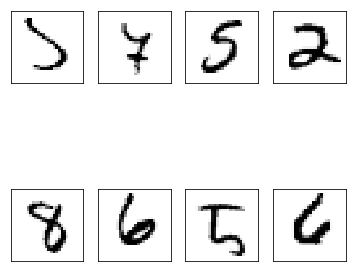

label: tensor([5, 7, 5, 2, 8, 6, 5, 6])
prediction: tensor([3, 7, 5, 2, 8, 6, 5, 6], dtype=torch.int32)
epoch: 10/10 | step: 900/938 | training loss: 5.4683 | test loss: 7.4162


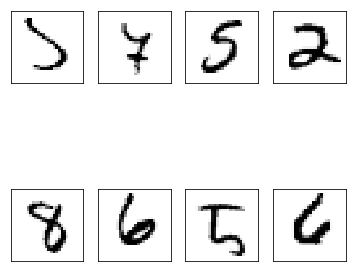

In [93]:
num_epochs = 10
# create figure for plotting
row_num = 2
col_num = 4

fig, ax = plt.subplots(row_num, col_num, figsize=(6,6))
for i, j in itertools.product(range(row_num), range(col_num)):
    ax[i,j].get_xaxis().set_visible(False)
    ax[i,j].get_yaxis().set_visible(False) 
    
train_loss_list = []
test_loss_list = []

for epoch in range(num_epochs):
    train_loss = 0.0
    
    for i, data in enumerate(train_loader):
        images, label = data


        for j, image in enumerate(images):
            x = image.view(image.shape[0], -1)
        
            optimizer.zero_grad()
            model_output = mnist(x)
            loss = criterion(model_output, label[j].view(1))

            loss.backward()

            optimizer.step()

            train_loss += loss.item()
            
            del loss
            del model_output
            
            
        if (i+1) % 100 == 0 :
             with torch.no_grad():
                    
                test_loss = 0.0
                    
                for k, test in enumerate(test_loader):
                    test_image, test_label = test
                    prediction_label = torch.zeros(test_label.size(), dtype=torch.int32)
                    
                    for l, t_image in enumerate(test_image):
                            
                        test_x = t_image.view(t_image.shape[0], -1)
                        test_output = mnist(test_x)
                        prediction_label[l] = test_output.argmax(dim=1)
                        t_loss = criterion(test_output, test_label[l].view(1))
                        test_loss += t_loss.item()

                for m in range(row_num*col_num):
                    ii = m//col_num
                    jj = m%col_num
                    ax[ii,jj].cla()
                    ax[ii,jj].imshow(test_image[m,:].data.cpu().numpy().reshape(28,28), cmap='Greys')

                display.clear_output(wait=True)
                display.display(plt.gcf()) 

                print("label: {}".format(test_label[:row_num*col_num]))
                print("prediction: {}".format(prediction_label[:row_num*col_num]))
                        
                del test_output
                del t_loss

                print("epoch: {}/{} | step: {}/{} | training loss: {:.4f} | test loss: {:.4f}".format(
                    epoch+1, num_epochs, i+1, num_batches, train_loss / 100, test_loss/ len(test_loader)
                ))            

                train_loss_list.append(train_loss/100)
                test_loss_list.append(test_loss/len(test_loader))
                train_loss = 0.0

Text(0,0.5,'loss')

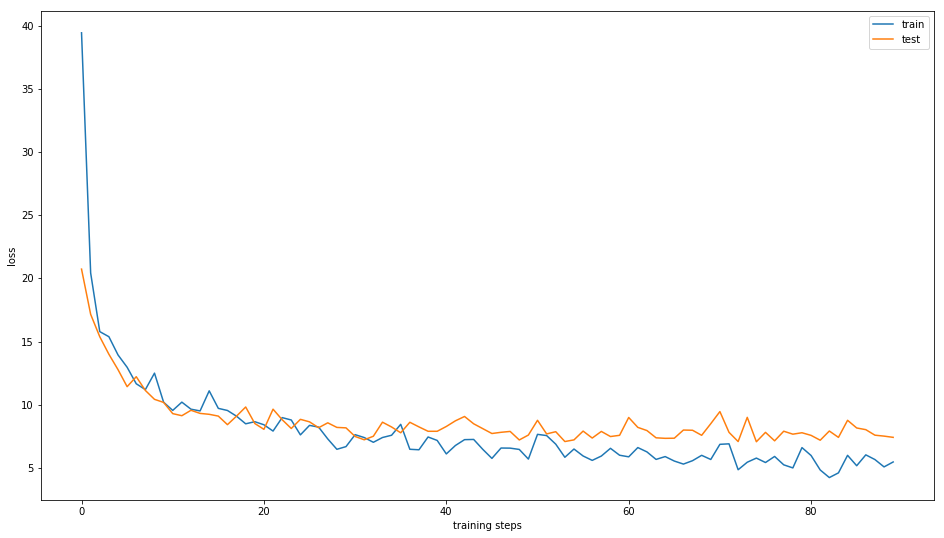

In [94]:
plt.figure(figsize=(16,9))
x_range = range(len(train_loss_list))
plt.plot(x_range, train_loss_list, label="train")
plt.plot(x_range, test_loss_list, label="test")
plt.legend()
plt.xlabel("training steps")
plt.ylabel("loss")

In [95]:
# test acc
with torch.no_grad():
    corr_num = 0
    total_num = 0
    
    for j, test in enumerate(test_loader):
        test_image, test_label = test
        prediction_label = torch.zeros(test_label.size(), dtype=torch.long)
                    
        for l, t_image in enumerate(test_image):
            test_x = t_image.view(t_image.shape[0], -1)
            test_output = mnist(test_x)
            prediction_label[l] = test_output.argmax(dim=1)
            t_loss = criterion(test_output, test_label[l].view(1))
            test_loss += t_loss.item()
        
        corr = test_label[test_label == prediction_label].size(0)
        corr_num += corr
        total_num += test_label.size(0)


print("acc: {:.2f}".format(corr_num / total_num * 100))

acc: 96.77
